### ***`Imports`***


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import joblib
import pickle
!pip install colorama
from colorama import Fore, Style

from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score,GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category= ConvergenceWarning)

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### ***`Read & Presenting Data`***

In [52]:
data= pd.read_csv('/content/drive/MyDrive/train_ML.csv')
data.head(10)

,Unnamed: 0,id,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,owner_2_score,RATE_owner_2,CAP_AMOUNT_owner_2,PERCENT_OWN_owner_2,...,INPUT_VALUE_ID_FOR_avg_net_deposits,RATE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,RATE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id,completion_status
0,900,4813,606.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00000,NaN,preferred,NaN,606.0,A,150000.0,100.0,4642,Paid off with renewal
1,329,1406,703.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,107027.25000,NaN,preferred,NaN,703.0,A,150000.0,100.0,1362,Paid in full
2,1035,7415,692.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00000,NaN,preferred,NaN,692.0,A,150000.0,100.0,6485,Default
3,1670,6759,684.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00000,NaN,preferred,NaN,684.0,A,150000.0,100.0,6035,Paid via discounted payoff
4,1726,5867,625.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00000,NaN,preferred,NaN,625.0,A,150000.0,100.0,5299,Paid in full
5,1900,7491,677.0,A,150000.0,50.0,654.0,A,150000.0,50.0,...,407304.50000,NaN,preferred,NaN,665.0,A,150000.0,100.0,6518,Default
6,1885,9464,601.0,B,100000.0,100.0,NaN,NaN,NaN,NaN,...,78771.70000,NaN,preferred,NaN,601.0,B,100000.0,100.0,7777,Default
7,108,562,525.0,C,35000.0,100.0,NaN,NaN,NaN,NaN,...,20348.33333,NaN,preferred,NaN,525.0,C,35000.0,100.0,486,Paid off with renewal
8,951,6715,588.0,B,100000.0,100.0,NaN,NaN,NaN,NaN,...,15947.66667,NaN,preferred,NaN,588.0,B,100000.0,100.0,5972,Paid off with renewal
9,1335,3257,0.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,...,0.00000,NaN,preferred,NaN,0.0,NaN,NaN,0.0,3435,Paid off with renewal


In [53]:
shape =data.shape
print ("Shape Of data :", shape )
# Get the maximum length of column names for formatting
max_length = max([len(column) for column in data.columns])
# Summarize the number of rows with missing values for each column
for column in data.columns:
    # Count number of rows with missing values
    n_miss = data[column].isnull().sum()
    perc = n_miss / data.shape[0] * 100
    print(f'{column: <{max_length}}   Missing: {n_miss: <4}   ({perc:.1f}%)')


Shape Of data : (1537, 56)
Unnamed: 0                                 Missing: 0      (0.0%)
id                                         Missing: 0      (0.0%)
owner_1_score                              Missing: 21     (1.4%)
RATE_owner_1                               Missing: 27     (1.8%)
CAP_AMOUNT_owner_1                         Missing: 31     (2.0%)
PERCENT_OWN_owner_1                        Missing: 13     (0.8%)
owner_2_score                              Missing: 1352   (88.0%)
RATE_owner_2                               Missing: 1352   (88.0%)
CAP_AMOUNT_owner_2                         Missing: 1363   (88.7%)
PERCENT_OWN_owner_2                        Missing: 1313   (85.4%)
owner_3_score                              Missing: 1530   (99.5%)
RATE_owner_3                               Missing: 1530   (99.5%)
CAP_AMOUNT_owner_3                         Missing: 1530   (99.5%)
PERCENT_OWN_owner_3                        Missing: 1504   (97.9%)
years_in_business                        

In [54]:
shape =data.shape
print ("Shape Of data :", shape )
print("*************************")
data.isna().sum()

Shape Of data : (1537, 56)
*************************


Unnamed: 0                                     0
id                                             0
owner_1_score                                 21
RATE_owner_1                                  27
CAP_AMOUNT_owner_1                            31
PERCENT_OWN_owner_1                           13
owner_2_score                               1352
RATE_owner_2                                1352
CAP_AMOUNT_owner_2                          1363
PERCENT_OWN_owner_2                         1313
owner_3_score                               1530
RATE_owner_3                                1530
CAP_AMOUNT_owner_3                          1530
PERCENT_OWN_owner_3                         1504
years_in_business                             12
RATE_ID_FOR_years_in_business                 12
fsr                                          417
RATE_ID_FOR_fsr                             1522
location                                      10
RATE_ID_FOR_location                          64
funded_last_30      

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                1537 non-null   int64  
 1   id                                        1537 non-null   int64  
 2   owner_1_score                             1516 non-null   float64
 3   RATE_owner_1                              1510 non-null   object 
 4   CAP_AMOUNT_owner_1                        1506 non-null   float64
 5   PERCENT_OWN_owner_1                       1524 non-null   float64
 6   owner_2_score                             185 non-null    float64
 7   RATE_owner_2                              185 non-null    object 
 8   CAP_AMOUNT_owner_2                        174 non-null    float64
 9   PERCENT_OWN_owner_2                       224 non-null    float64
 10  owner_3_score                       

In [56]:
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns

def visualisation(data):
# Extract features and target
    X = data.drop('completion_status', axis=1)
    y = data['completion_status']

    # Calculate information gain for each feature
    ig = mutual_info_classif(X, y)

    # Print information gain for each feature
    plt.bar(X.columns, ig)

    # Add labels and title
    plt.xlabel('Feature')
    plt.ylabel('Information Gain')
    plt.title('Information Gain for Each Feature')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()
    sns.heatmap(data.corr(),cmap='coolwarm')

    #def plot_categorical_distribution(df, column):
    plt.figure(figsize=(7, 7))  # Adjust the figure size as needed
    sns.histplot(data[column].dropna())
    plt.title(f'Distribution of {column}')
    plt.show()

### ***`Pre-Processing Function`***

In [57]:
def pre (loan):
  #********************************Drop*****************************************
  # Drop the column if it has more than 65% null values
  loan.drop(['Unnamed: 0','id'], axis=1, inplace=True)
  for col in loan.columns:
    pct_null = loan[col].isnull().sum() / len(loan) * 100
    if pct_null > 65:
        loan.drop(col, axis=1, inplace=True)


  #********************************fill null*****************************************
  # Check if the column is not of object type
  # fill null values with mean for numeric columns if percentage is greater than or equal to 7%
  # Then fill null values with mode for non-numeric columns

  knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
  mean_values = {}
  mode_values = {}

  for col in loan.columns:
      if loan[col].dtype != 'object' :
          null_percentage = loan[col].isnull().sum() / len(loan) * 100
          if null_percentage < 1.5:
              imputed_col = knn_imputer.fit_transform(loan[col].values.reshape(-1, 1))
              loan[col] = imputed_col
              mean_values[col] = imputed_col

              # with open('imputer.pkl', 'wb') as f:
              #   pickle.dump(imputed_col, f)


          else:
              mean = loan[col].mean()
              loan[col] = loan[col].fillna(mean)
              mean_values[col] = mean
      elif loan[col].isnull().sum() / len(loan) * 100 < 10:
          mode = loan[col].mode()[0]
          loan[col] = loan[col].fillna(mode)
          mode_values[col] = mode



  #********************************encoding******************************************
  numerical_cols = []
  non_numerical_cols = []
  label_encodersss={}
  for col in loan.columns:
    if loan[col].dtype != 'object':
        numerical_cols.append(col)
    else:
        non_numerical_cols.append(col)


  for col in non_numerical_cols:
      label_encoder = preprocessing.LabelEncoder()
      loan[col] = label_encoder.fit_transform(loan[col].values.reshape(-1, 1))
      label_encodersss[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

  for col, encoder_dict in label_encodersss.items():
        print(f"Feature: {col}")
        for original_value, encoded_value in encoder_dict.items():
            print(f"Original Value: {original_value}, Encoded Value: {encoded_value}")
            print("\n")





  visualisation(loan)

  # with open('label_encoder.pkl', 'wb') as f:
  #   pickle.dump(label_encoder, f)

  # import pickle
  # from sklearn.preprocessing import OrdinalEncoder


  # label_encoder = OrdinalEncoder()
  # label_encoder.fit(X)


  #********************************handel null value >10% with Decision Tree Classifier ******************************************
  # Check if the column is numeric and has more than 10% NaN values
  # Separate rows with missing values in the column
  # Separate rows with missing values in the column
  # Separate rows with missing values in the column then Concatenate the filled and complete dataframes

  # for col in loan.columns:
  #   if loan[col].dtype != 'object' and loan[col].isnull().sum() / len(loan) * 100 > 10:

  #       missing_fsr = loan[loan[col].isnull()]
  #       complete_fsr = loan[~loan[col].isnull()]
  #       X_train = complete_fsr.drop(columns=[col])
  #       y_train = complete_fsr[col]

  #       model = DecisionTreeClassifier()
  #       model.fit(X_train, y_train)
  #       X_missing_fsr = missing_fsr.drop(columns=[col])
  #       predicted_fsr = model.predict(X_missing_fsr)
  #       missing_fsr[col] = predicted_fsr
  #       filled = pd.concat([complete_fsr, missing_fsr])
  #       loan = filled
        #loan_pre = pd.concat([filled, loan[~loan['fsr'].isnull()]])



  #********************************Feature Selection:******************************************
  # Compute the correlation matrix
  # Compute the correlation between the correlation matrix
  # Compute the correlation between the correlation matrix
  # Collect columns with high correlation
  # Drop columns that are not in high_corr_values

  loan1 = loan.drop("completion_status", axis=1).corr()
  data = loan1.corr()
  high_corr = np.logical_and(data > 0.1, data < 1)

  high_corr_values = []
  for row in high_corr.index:
      for col in high_corr.columns:
          if high_corr.loc[row, col]:
              high_corr_values.append(col)

  columns_to_drop = [col for col in loan1.columns if col not in high_corr_values]

  for col in loan1:
    if col not in high_corr_values:
        loan.drop(col, axis=1, inplace=True)



  loan.to_csv('Data_After_Pre.csv', index=False)

  return loan , mean_values , mode_values , label_encodersss

### ***`call Pre-Processing `***

Feature: RATE_owner_1
Original Value: A, Encoded Value: 0


Original Value: B, Encoded Value: 1


Original Value: C, Encoded Value: 2


Original Value: D, Encoded Value: 3


Original Value: R, Encoded Value: 4


Feature: RATE_ID_FOR_years_in_business
Original Value: A, Encoded Value: 0


Original Value: B, Encoded Value: 1


Original Value: C, Encoded Value: 2


Original Value: D, Encoded Value: 3


Feature: location
Original Value: BRICK, Encoded Value: 0


Original Value: Home, Encoded Value: 1


Original Value: Unknown, Encoded Value: 2


Original Value: Verified, Encoded Value: 3


Feature: RATE_ID_FOR_location
Original Value: A, Encoded Value: 0


Feature: funded_last_30
Original Value: N, Encoded Value: 0


Original Value: Y, Encoded Value: 1


Feature: RATE_ID_FOR_judgement_lien_percent
Original Value: A, Encoded Value: 0


Original Value: B, Encoded Value: 1


Original Value: C, Encoded Value: 2


Original Value: D, Encoded Value: 3


Feature: RATE_ID_FOR_judgement_lien_amount


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Original Value: B, Encoded Value: 1


Original Value: C, Encoded Value: 2


Original Value: D, Encoded Value: 3


Original Value: R, Encoded Value: 4


Feature: completion_status
Original Value: Default, Encoded Value: 0


Original Value: Paid in full, Encoded Value: 1


Original Value: Paid off with renewal, Encoded Value: 2


Original Value: Paid via discounted payoff, Encoded Value: 3




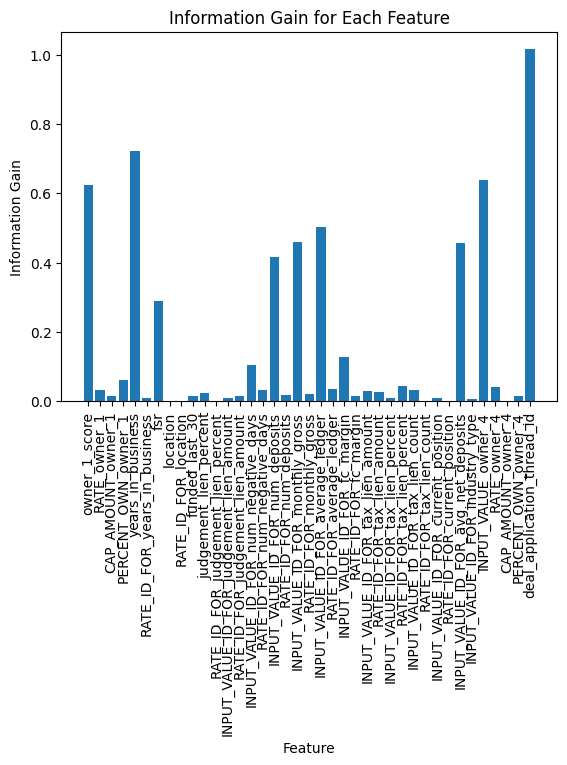

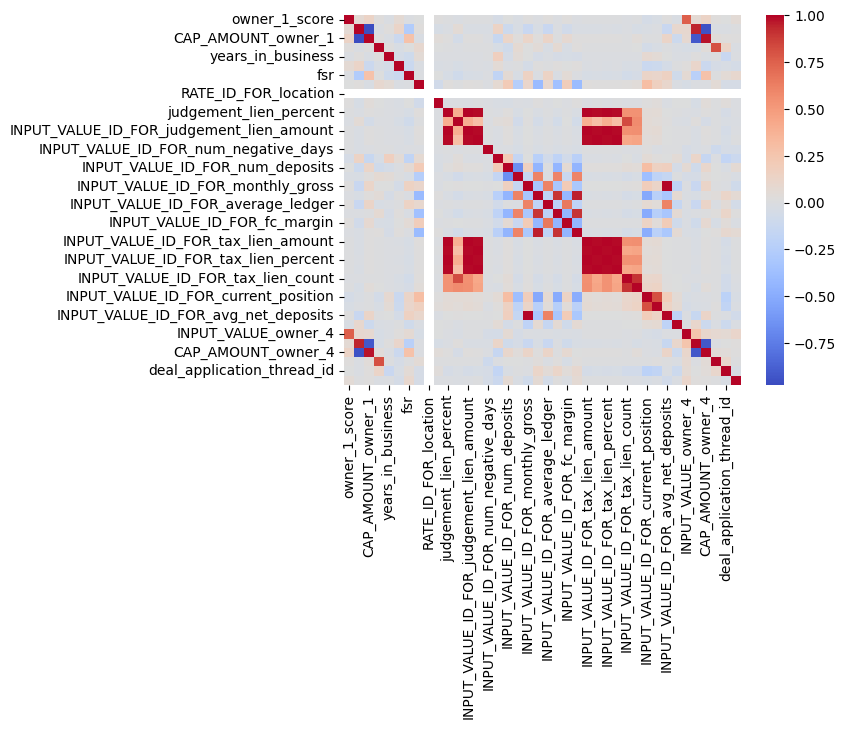

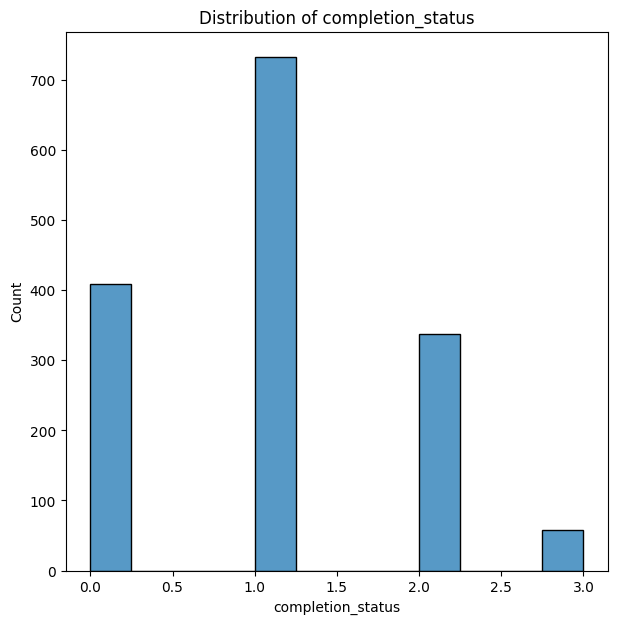

In [58]:
data , mean_values , mode_values , label_encodersss = pre(data)

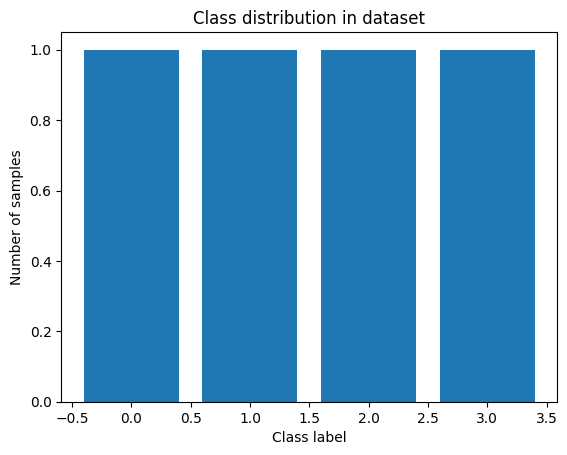

In [59]:
d=data["completion_status"].unique()
import matplotlib.pyplot as plt
unique_labels, counts = np.unique(d, return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

In [60]:
data.shape


(1537, 37)

In [61]:
shape =data.shape
print ("Shape Of data :", shape )
print("*************************")
data.isna().sum()

Shape Of data : (1537, 37)
*************************


owner_1_score                               0
RATE_owner_1                                0
CAP_AMOUNT_owner_1                          0
PERCENT_OWN_owner_1                         0
years_in_business                           0
RATE_ID_FOR_years_in_business               0
fsr                                         0
location                                    0
judgement_lien_percent                      0
RATE_ID_FOR_judgement_lien_percent          0
INPUT_VALUE_ID_FOR_judgement_lien_amount    0
RATE_ID_FOR_judgement_lien_amount           0
RATE_ID_FOR_num_negative_days               0
INPUT_VALUE_ID_FOR_num_deposits             0
RATE_ID_FOR_num_deposits                    0
INPUT_VALUE_ID_FOR_monthly_gross            0
RATE_ID_FOR_monthly_gross                   0
INPUT_VALUE_ID_FOR_average_ledger           0
RATE_ID_FOR_average_ledger                  0
INPUT_VALUE_ID_FOR_fc_margin                0
RATE_ID_FOR_fc_margin                       0
INPUT_VALUE_ID_FOR_tax_lien_amount

### ***`Models Function:`***

##### model only

In [62]:
def Models (loan):
  X_tv = loan.drop("completion_status", axis = 1).copy()
  y_tv = loan["completion_status"].copy()

  scaler = StandardScaler()
  X_tv = scaler.fit_transform(X_tv)

  X_train, X_test, y_train, y_test = train_test_split(X_tv, y_tv, test_size=0.2,random_state=101)


  models = [
    xgb.XGBClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    # SVC(),



  ]

  for model in models:

      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)



      acc = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred, average='macro')
      recall = recall_score(y_test, y_pred, average='macro')
      f1 = f1_score(y_test, y_pred, average='macro')
      conf_matrix = confusion_matrix(y_test, y_pred)
      print(Fore.GREEN  + Style.BRIGHT + f"Model: {model.__class__.__name__}, Accuracy: {acc}")
      print("acc:", round(acc*100, 2), '%')
      print("Precision:", round(precision*100, 2), '%')
      print("Recall:", round(recall*100, 2), '%')
      print("F1 score:", round(f1*100, 2), '%')
      print("Confusion matrix:\n", conf_matrix)


##### model with GridSearchCV




In [63]:
def Model_Grid(loan):
    X_tv = loan.drop("completion_status", axis=1).copy()
    y_tv = loan["completion_status"].copy()

    # scaler = StandardScaler()
    # X_tv = scaler.fit_transform(X_tv)

    X_train, X_test, y_train, y_test = train_test_split(X_tv, y_tv, test_size=0.2, random_state=101)

    models = [
    {"model": xgb.XGBClassifier(), "params": {"n_estimators": [100, 200, 300],'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.5, 0.001,0.8]}},
    {"model": GradientBoostingClassifier(),"params": {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 0.8]}},
    {"model": DecisionTreeClassifier(), "params": {"max_depth": [None, 5, 10], "min_samples_split": [2, 5], "criterion": ["gini", "entropy"]}},
    {"model": RandomForestClassifier(), "params": {"n_estimators": [100, 200, 300], "max_depth": [None, 5, 10], "min_samples_split": [2, 5]}},
    # {"model": SVC(), "params": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": [1, 0.1, 0.01, 0.001, 0.0001]}}
]

    for model_info in models:
        model = model_info["model"]
        params = model_info["params"]

        grid_search = GridSearchCV(model, params, scoring="accuracy",cv=2)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        y_pred = best_model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        conf_matrix = confusion_matrix(y_test, y_pred)

        print(Fore.GREEN + Style.BRIGHT + f"Model: {best_model.__class__.__name__}, Accuracy: {acc}")
        print(Style.RESET_ALL)
        print("Accuracy:", round(acc * 100, 2), '%')
        print("Precision:", round(precision * 100, 2), '%')
        print("Recall:", round(recall * 100, 2), '%')
        print("F1 score:", round(f1 * 100, 2), '%')
        print("Confusion matrix:\n", conf_matrix)
        print(Fore.GREEN + Style.BRIGHT + "Best Parameters:", grid_search.best_params_)
        print(Fore.RED + Style.BRIGHT + "**************************************************************")
        print(Fore.BLUE + Style.BRIGHT + "**************************************************************")
        print(Fore.MAGENTA + Style.BRIGHT + "**************************************************************")
        print(Style.RESET_ALL)


        joblib.dump(best_model, f"{best_model.__class__.__name__}_model.joblib")


### ***`call models`***

##### model only

In [64]:
Models(data)

Model: XGBClassifier, Accuracy: 0.9772727272727273
acc: 97.73 %
Precision: 96.82 %
Recall: 98.11 %
F1 score: 97.43 %
Confusion matrix:
 [[ 73   0   2   1]
 [  1 146   2   0]
 [  0   1  61   0]
 [  0   0   0  21]]
Model: GradientBoostingClassifier, Accuracy: 0.9253246753246753
acc: 92.53 %
Precision: 93.01 %
Recall: 91.0 %
F1 score: 91.95 %
Confusion matrix:
 [[ 67   5   3   1]
 [  5 144   0   0]
 [  0   7  55   0]
 [  0   0   2  19]]
Model: DecisionTreeClassifier, Accuracy: 0.9188311688311688
acc: 91.88 %
Precision: 92.64 %
Recall: 90.42 %
F1 score: 91.34 %
Confusion matrix:
 [[ 66   5   5   0]
 [  7 140   2   0]
 [  0   3  59   0]
 [  1   0   2  18]]
Model: RandomForestClassifier, Accuracy: 0.9512987012987013
acc: 95.13 %
Precision: 96.07 %
Recall: 91.41 %
F1 score: 93.47 %
Confusion matrix:
 [[ 71   3   2   0]
 [  0 148   1   0]
 [  1   4  57   0]
 [  2   1   1  17]]


##### with GridSearchCV

In [65]:
Model_Grid(data)

Model: XGBClassifier, Accuracy: 0.974025974025974

Accuracy: 97.4 %
Precision: 96.43 %
Recall: 96.92 %
F1 score: 96.66 %
Confusion matrix:
 [[ 73   0   2   1]
 [  1 146   2   0]
 [  0   1  61   0]
 [  1   0   0  20]]
Best Parameters: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 300}
**************************************************************
**************************************************************
**************************************************************

Model: GradientBoostingClassifier, Accuracy: 0.9707792207792207

Accuracy: 97.08 %
Precision: 97.88 %
Recall: 95.56 %
F1 score: 96.65 %
Confusion matrix:
 [[ 72   3   1   0]
 [  1 147   1   0]
 [  0   1  61   0]
 [  0   2   0  19]]
Best Parameters: {'learning_rate': 0.5, 'n_estimators': 100}
**************************************************************
**************************************************************
**************************************************************

Model: DecisionTreeClassifier, Ac


### ***`Test Script`***

In [24]:
def model_evaluation (test_labels, test_predictions):
    accuracy = accuracy_score(test_labels, test_predictions)
    precision = precision_score(test_labels, test_predictions,average='micro')
    recall = recall_score(test_labels, test_predictions,average='micro')
    f1 = f1_score(test_labels, test_predictions,average='micro')
    confusion_mat = confusion_matrix(test_labels, test_predictions)

    print("acc:", round(accuracy*100, 2), '%')
    print("Precision:", round(precision*100, 2), '%')
    print("Recall:", round(recall*100, 2), '%')
    print("F1 score:", round(f1*100, 2), '%')
    print("Confusion matrix:\n", confusion_mat)
    print(Fore.RED + Style.BRIGHT +"**************************************************************")
    print(Fore.BLUE +Style.BRIGHT +"**************************************************************")
    print(Fore.MAGENTA +Style.BRIGHT +"**************************************************************")
    print(Style.RESET_ALL)

In [66]:
def test_data (test , data , mean_values , mode_values , label_encodersss):
    for col in test:
      if col not in data.columns:
        test.drop(col, axis=1, inplace=True)

    numerical_cols = []
    non_numerical_cols = []

    for col in test.columns:
      if test[col].dtype != 'object':
          numerical_cols.append(col)
      else:
          non_numerical_cols.append(col)

    for col in test:
      if test[col].dtype != 'object' :
         test[col].fillna(mean_values.get(col).mean(), inplace=True)
      else :
          test[col].fillna(mode_values.get(col) , inplace=True)

    for col in test:
       if test[col].dtype == 'object' :
          label_object = label_encodersss.get(col)
          test[col] = test[col].apply(lambda x: label_object.get(x, -1))

    xgb_model = joblib.load("XGBClassifier_model.joblib")
    Gradien_model = joblib.load("GradientBoostingClassifier_model.joblib")
    dt_model = joblib.load("DecisionTreeClassifier_model.joblib")
    rf_model = joblib.load("RandomForestClassifier_model.joblib")

    models = [xgb_model,Gradien_model, dt_model, rf_model]
    model_names = ["XGBClassifier","GradientBoostingClassifier" ,"DecisionTreeClassifier", "RandomForestClassifier"]

    decode_mapping = {
        2: 'Paid off with renewal',
        1: 'Paid in full',
        0: 'Default',
        3: 'Paid via discounted payoff'
    }

    for model, model_name in zip(models, model_names):
        test_copy = test.copy()  # create a copy of the test data
        y_pred = model.predict(test_copy)
        test_copy['completion_status'] = y_pred
        test_copy['completion_status'] = test_copy['completion_status'].map(decode_mapping)
        test_copy.to_csv(f'{model_name}_predictions.csv',index=False)
        print(test_copy['completion_status'])


In [67]:
tst_df= pd.read_csv('/content/drive/MyDrive/test_ML.csv')

In [68]:
test_data (tst_df , data , mean_values , mode_values,label_encodersss)

0           Paid off with renewal
1      Paid via discounted payoff
2           Paid off with renewal
3                         Default
4                    Paid in full
                  ...            
268                       Default
269                       Default
270                       Default
271                       Default
272                  Paid in full
Name: completion_status, Length: 273, dtype: object
0           Paid off with renewal
1      Paid via discounted payoff
2           Paid off with renewal
3                         Default
4                    Paid in full
                  ...            
268                       Default
269                       Default
270                       Default
271                       Default
272                  Paid in full
Name: completion_status, Length: 273, dtype: object
0           Paid off with renewal
1      Paid via discounted payoff
2           Paid off with renewal
3                         Default
4           